In [24]:
import pandas as pd
from tqdm.auto import tqdm
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
import math
tqdm.pandas()

In [25]:
road = 1
direction = "out"
df = pd.read_csv(
    f'../dataset/2020-02-road-{road}-{direction}.csv', parse_dates=["datetime"])
# df = df.drop(['all_units','samecell_units','max_speed','avg_traveltime','max_traveltime'],axis=1)
# df = df[df["avg_speed"] <= 80]
df


,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime
0,2020-02-01 00:00:34,1,25,out,1,0,0,1,43,43,0,0
1,2020-02-01 00:00:34,1,26,out,1,0,0,1,71,71,0,0
2,2020-02-01 00:00:34,1,27,out,1,0,0,1,0,0,0,0
3,2020-02-01 00:00:34,1,28,out,2,1,2,1,41,48,0,0
4,2020-02-01 00:00:34,1,29,out,3,3,4,0,75,108,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23500044,2020-02-29 23:59:14,1,925,out,0,0,1,0,0,0,0,0
23500045,2020-02-29 23:59:14,1,926,out,1,1,0,0,51,51,60,60
23500046,2020-02-29 23:59:14,1,939,out,1,0,0,1,57,57,0,0
23500047,2020-02-29 23:59:14,1,953,out,0,0,1,0,0,0,0,0


In [26]:
dfm = pd.read_csv(f'../dataset/road{road}-{direction}-mffs.csv')
dfm

,road,direction,km,mffs
0,1,out,19,20
1,1,out,25,134
2,1,out,26,130
3,1,out,27,141
4,1,out,28,144
...,...,...,...,...
965,1,out,989,109
966,1,out,990,121
967,1,out,991,97
968,1,out,992,85


In [27]:
df['mffs'] = df['km'].map(dfm.set_index('km')['mffs'])
df

,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,mffs
0,2020-02-01 00:00:34,1,25,out,1,0,0,1,43,43,0,0,134
1,2020-02-01 00:00:34,1,26,out,1,0,0,1,71,71,0,0,130
2,2020-02-01 00:00:34,1,27,out,1,0,0,1,0,0,0,0,141
3,2020-02-01 00:00:34,1,28,out,2,1,2,1,41,48,0,0,144
4,2020-02-01 00:00:34,1,29,out,3,3,4,0,75,108,0,0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23500044,2020-02-29 23:59:14,1,925,out,0,0,1,0,0,0,0,0,119
23500045,2020-02-29 23:59:14,1,926,out,1,1,0,0,51,51,60,60,107
23500046,2020-02-29 23:59:14,1,939,out,1,0,0,1,57,57,0,0,99
23500047,2020-02-29 23:59:14,1,953,out,0,0,1,0,0,0,0,0,121


In [28]:
df.isna().any()

datetime          False
road_number       False
km                False
direction         False
all_units         False
inflow_units      False
outflow_unit      False
samecell_units    False
avg_speed         False
max_speed         False
avg_traveltime    False
max_traveltime    False
mffs              False
dtype: bool

In [29]:
df

,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,mffs
0,2020-02-01 00:00:34,1,25,out,1,0,0,1,43,43,0,0,134
1,2020-02-01 00:00:34,1,26,out,1,0,0,1,71,71,0,0,130
2,2020-02-01 00:00:34,1,27,out,1,0,0,1,0,0,0,0,141
3,2020-02-01 00:00:34,1,28,out,2,1,2,1,41,48,0,0,144
4,2020-02-01 00:00:34,1,29,out,3,3,4,0,75,108,0,0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23500044,2020-02-29 23:59:14,1,925,out,0,0,1,0,0,0,0,0,119
23500045,2020-02-29 23:59:14,1,926,out,1,1,0,0,51,51,60,60,107
23500046,2020-02-29 23:59:14,1,939,out,1,0,0,1,57,57,0,0,99
23500047,2020-02-29 23:59:14,1,953,out,0,0,1,0,0,0,0,0,121


In [30]:
df['portion_speed'] = df['avg_speed']/df['mffs']
df

,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,mffs,portion_speed
0,2020-02-01 00:00:34,1,25,out,1,0,0,1,43,43,0,0,134,0.320896
1,2020-02-01 00:00:34,1,26,out,1,0,0,1,71,71,0,0,130,0.546154
2,2020-02-01 00:00:34,1,27,out,1,0,0,1,0,0,0,0,141,0.000000
3,2020-02-01 00:00:34,1,28,out,2,1,2,1,41,48,0,0,144,0.284722
4,2020-02-01 00:00:34,1,29,out,3,3,4,0,75,108,0,0,121,0.619835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23500044,2020-02-29 23:59:14,1,925,out,0,0,1,0,0,0,0,0,119,0.000000
23500045,2020-02-29 23:59:14,1,926,out,1,1,0,0,51,51,60,60,107,0.476636
23500046,2020-02-29 23:59:14,1,939,out,1,0,0,1,57,57,0,0,99,0.575758
23500047,2020-02-29 23:59:14,1,953,out,0,0,1,0,0,0,0,0,121,0.000000


In [31]:
df['inflow_units_N'] = (df["inflow_units"] - df["inflow_units"].min()) / (df["inflow_units"].max() - df["inflow_units"].min())
df['outflow_units_N'] = (df["outflow_unit"] - df["outflow_unit"].min()) / (df["outflow_unit"].max() - df["outflow_unit"].min())
# df['avg_speed_N'] = (df["avg_speed"] - df["avg_speed"].min()) / (df["avg_speed"].max() - df["avg_speed"].min())
df

,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,mffs,portion_speed,inflow_units_N,outflow_units_N
0,2020-02-01 00:00:34,1,25,out,1,0,0,1,43,43,0,0,134,0.320896,0.000000,0.000000
1,2020-02-01 00:00:34,1,26,out,1,0,0,1,71,71,0,0,130,0.546154,0.000000,0.000000
2,2020-02-01 00:00:34,1,27,out,1,0,0,1,0,0,0,0,141,0.000000,0.000000,0.000000
3,2020-02-01 00:00:34,1,28,out,2,1,2,1,41,48,0,0,144,0.284722,0.021739,0.045455
4,2020-02-01 00:00:34,1,29,out,3,3,4,0,75,108,0,0,121,0.619835,0.065217,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23500044,2020-02-29 23:59:14,1,925,out,0,0,1,0,0,0,0,0,119,0.000000,0.000000,0.022727
23500045,2020-02-29 23:59:14,1,926,out,1,1,0,0,51,51,60,60,107,0.476636,0.021739,0.000000
23500046,2020-02-29 23:59:14,1,939,out,1,0,0,1,57,57,0,0,99,0.575758,0.000000,0.000000
23500047,2020-02-29 23:59:14,1,953,out,0,0,1,0,0,0,0,0,121,0.000000,0.000000,0.022727


In [32]:
# sns.pairplot(df,vars=['inflow_units_N','outflow_units_N','avg_speed_N'],hue="cluster")

In [33]:
# fig = px.scatter_matrix(df.drop(["datetime","road_number","km","direction","inflow_units","outflow_unit","avg_speed"],axis=1),width=600, height=1000)
# fig.show()

In [34]:
# df.max(axis=0)

In [35]:
X = df[['inflow_units_N','outflow_units_N','portion_speed']].values
X

array([[0.        , 0.        , 0.32089552],
       [0.        , 0.        , 0.54615385],
       [0.        , 0.        , 0.        ],
       ...,
       [0.        , 0.        , 0.57575758],
       [0.        , 0.02272727, 0.        ],
       [0.02173913, 0.        , 0.52586207]])

In [36]:
# WCSS = []
# for i in range(1,11):
#     model = KMeans(n_clusters = i,init = 'k-means++')
#     model.fit(X)
#     WCSS.append(model.inertia_)
# fig = plt.figure(figsize = (7,7))
# plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'blue')
# plt.xticks(np.arange(11))
# plt.xlabel("Number of clusters")
# plt.ylabel("WCSS")
# plt.show()

In [37]:
model = KMeans(n_clusters = 5,init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(X)
df['cluster'] = y_clusters
y_clusters

array([2, 1, 0, ..., 4, 0, 1])

C:\Users\Tananett\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

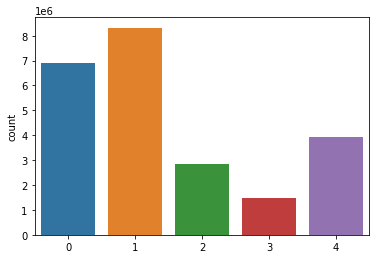

In [38]:
sns.countplot(y_clusters)

In [39]:
print(X[y_clusters == 0,0][0])
print(X[y_clusters == 0,1][0])
print(X[y_clusters == 0,2][0])

0.0
0.0
0.0


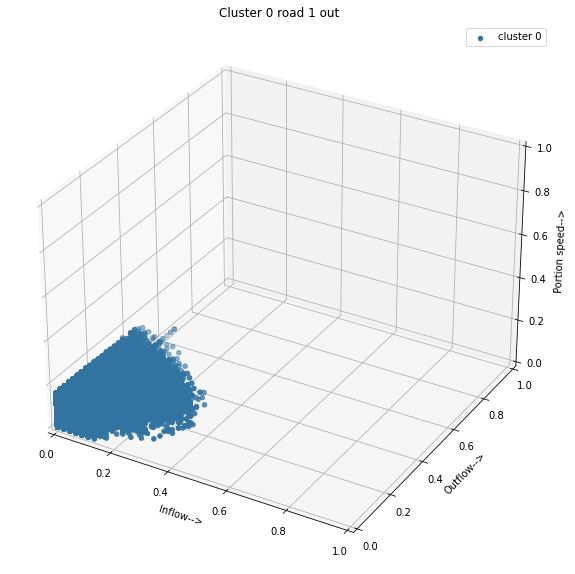

In [40]:
fig1 = plt.figure(figsize = (10,10))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(X[y_clusters == 0,0],X[y_clusters == 0,1],X[y_clusters == 0,2], s = 20 , color = '#3274A1', label = "cluster 0")
ax1.set_xlim3d(0,1)
ax1.set_ylim3d(0,1)
ax1.set_zlim3d(0,1)
ax1.set_xlabel('Inflow-->')
ax1.set_ylabel('Outflow-->')
ax1.set_zlabel('Portion speed-->')
ax1.set_title(f"Cluster 0 road {road} {direction}")
ax1.legend()
plt.show()

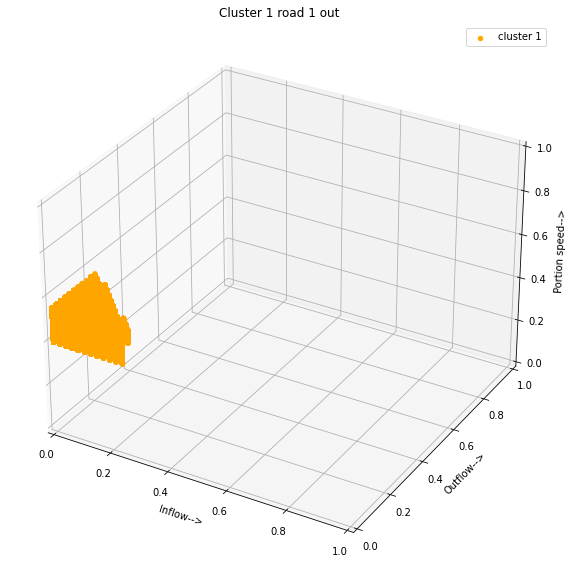

In [41]:
fig2 = plt.figure(figsize = (10,10))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1],X[y_clusters == 1,2], s = 20 , color = 'orange', label = "cluster 1")
ax2.set_xlim3d(0,1)
ax2.set_ylim3d(0,1)
ax2.set_zlim3d(0,1)
ax2.set_xlabel('Inflow-->')
ax2.set_ylabel('Outflow-->')
ax2.set_zlabel('Portion speed-->')
ax2.set_title(f"Cluster 1 road {road} {direction}")
ax2.legend()
plt.show()

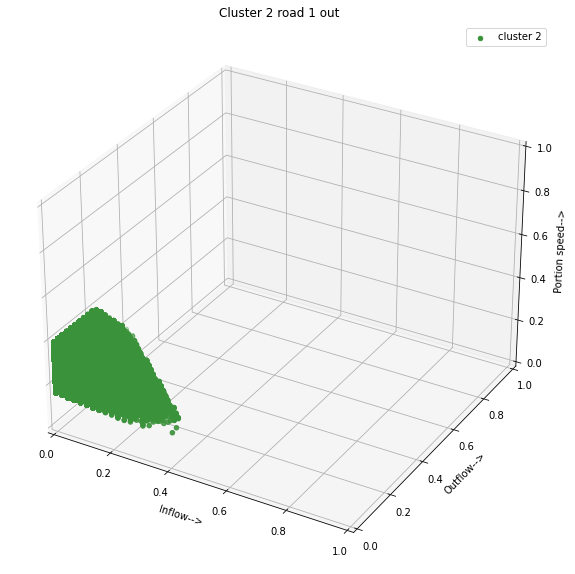

In [42]:
fig3 = plt.figure(figsize = (10,10))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(X[y_clusters == 2,0],X[y_clusters == 2,1],X[y_clusters == 2,2], s = 20 , color = '#3A923A', label = "cluster 2")
ax3.set_xlim3d(0,1)
ax3.set_ylim3d(0,1)
ax3.set_zlim3d(0,1)
ax3.set_xlabel('Inflow-->')
ax3.set_ylabel('Outflow-->')
ax3.set_zlabel('Portion speed-->')
ax3.set_title(f"Cluster 2 road {road} {direction}")
ax3.legend()
plt.show()

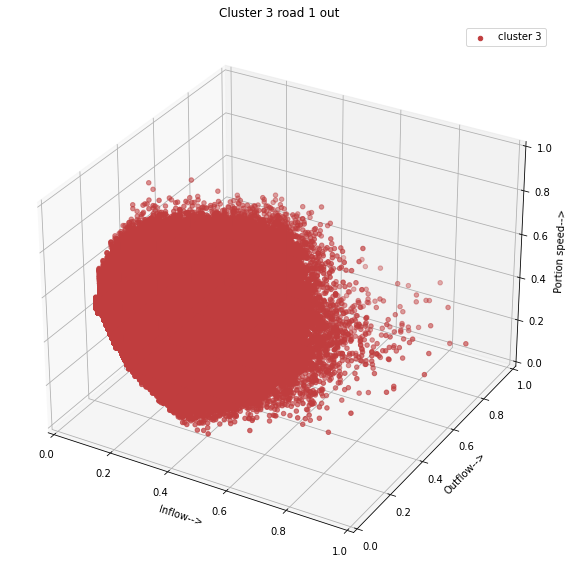

In [43]:
fig4 = plt.figure(figsize = (10,10))
ax4 = fig4.add_subplot(111, projection='3d')
ax4.scatter(X[y_clusters == 3,0],X[y_clusters == 3,1],X[y_clusters == 3,2], s = 20 , color = '#C03D3E', label = "cluster 3")
ax4.set_xlim3d(0,1)
ax4.set_ylim3d(0,1)
ax4.set_zlim3d(0,1)
ax4.set_xlabel('Inflow-->')
ax4.set_ylabel('Outflow-->')
ax4.set_zlabel('Portion speed-->')
ax4.set_title(f"Cluster 3 road {road} {direction}")
ax4.legend()
plt.show()

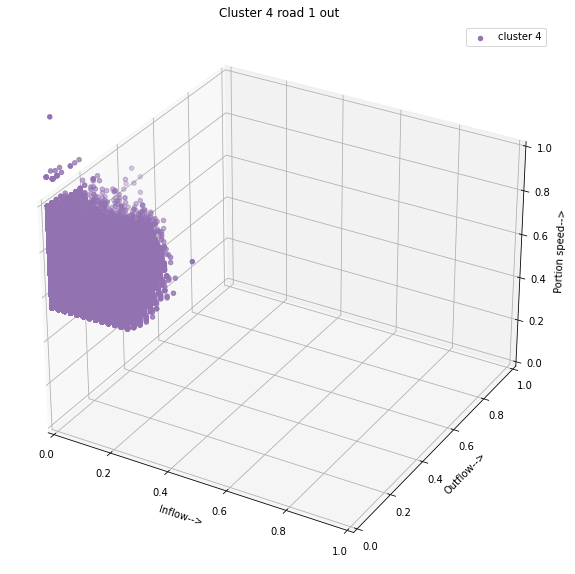

In [44]:
fig5 = plt.figure(figsize = (10,10))
ax5 = fig5.add_subplot(111, projection='3d')
ax5.scatter(X[y_clusters == 4,0],X[y_clusters == 4,1],X[y_clusters == 4,2], s = 20 , color = '#9372B2', label = "cluster 4")
ax5.set_xlim3d(0,1)
ax5.set_ylim3d(0,1)
ax5.set_zlim3d(0,1)
ax5.set_xlabel('Inflow-->')
ax5.set_ylabel('Outflow-->')
ax5.set_zlabel('Portion speed-->')
ax5.set_title(f"Cluster 4 road {road} {direction}")
ax5.legend()
plt.show()

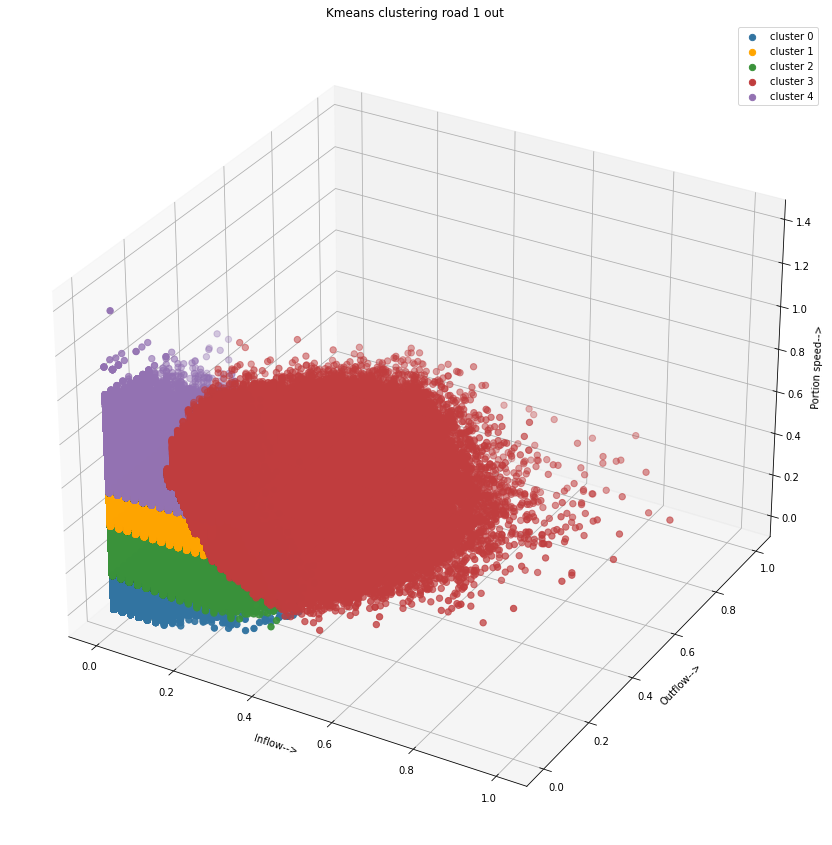

In [45]:
fig6 = plt.figure(figsize = (15,15))
ax6 = fig6.add_subplot(111, projection='3d')
ax6.scatter(X[y_clusters == 0,0],X[y_clusters == 0,1],X[y_clusters == 0,2], s = 40 , color = '#3274A1', label = "cluster 0")
ax6.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1],X[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax6.scatter(X[y_clusters == 2,0],X[y_clusters == 2,1],X[y_clusters == 2,2], s = 40 , color = '#3A923A', label = "cluster 2")
ax6.scatter(X[y_clusters == 3,0],X[y_clusters == 3,1],X[y_clusters == 3,2], s = 40 , color = '#C03D3E', label = "cluster 3")
ax6.scatter(X[y_clusters == 4,0],X[y_clusters == 4,1],X[y_clusters == 4,2], s = 40 , color = '#9372B2', label = "cluster 4")
# ax.scatter(X[y_clusters == 5,0],X[y_clusters == 5,1],X[y_clusters == 5,2], s = 40 , color = 'cyan', label = "cluster 5")
# ax.scatter(X[y_clusters == 6,0],X[y_clusters == 6,1],X[y_clusters == 6,2], s = 40 , color = 'yellow', label = "cluster 6")
ax6.set_xlabel('Inflow-->')
ax6.set_ylabel('Outflow-->')
ax6.set_zlabel('Portion speed-->')
ax6.set_title(f"Kmeans clustering road {road} {direction}")
ax6.legend()
plt.show()

In [46]:
df.to_csv(f"../dataset/newcluster/2020-02-road{road}-{direction}-5cluster.csv",index=False)